In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.feature_extraction.text import CountVectorizer
##from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
#from keras.utils.np_utils import to_categorical
import re

import tensorflow as tf

from tqdm import tqdm


# Import Plotting Libararies
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Model Evaluation Libraries
from sklearn.metrics import classification_report, confusion_matrix
!pip install gensim
import gensim
import pickle#

In [ ]:
data = pd.read_csv("/content/drive/My Drive/nlp/Sarcasm Dataset.csv")

In [ ]:
#data = data.dropna()

data = data[['tweet', 'sarcastic']]


X = data['tweet'].fillna("")
Y = data["sarcastic"]
data.shape

(3468, 2)

In [ ]:
data.head(10)

,tweet,sarcastic
0,The only thing I got from college is a caffein...,1
1,I love it when professors draw a big question ...,1
2,Remember the hundred emails from companies whe...,1
3,Today my pop-pop told me I was not “forced” to...,1
4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1
5,"@jimrossignol I choose to interpret it as ""XD""...",1
6,Why would Alexa's recipe for Yorkshire pudding...,1
7,someone hit me w a horse tranquilizer istg ive...,1
8,Loving season 4 of trump does America. Funnies...,1
9,Holly Arnold ??? Who #ImACeleb #MBE nope not ...,1


In [ ]:
data['clean_tweet'] = data['tweet'].apply(str)

data['clean_tweet'] = data['clean_tweet'].apply(lambda x: re.sub(r'http\S+', '', x))

In [ ]:
# remove punctuation marks
punctuation = '!"#$%&()*+-/:;<=>?@[\\]^_`{|}~'

data['clean_tweet'] = data['clean_tweet'].apply(lambda x: ''.join(ch for ch in x if ch not in set(punctuation)))

# convert text to lowercase
data['clean_tweet'] = data['clean_tweet'].str.lower()

# remove numbers
data['clean_tweet'] = data['clean_tweet'].str.replace("[0-9]", " ")

# remove whitespaces
data['clean_tweet'] = data['clean_tweet'].apply(lambda x:' '.join(x.split()))


In [ ]:
import spacy

nlp = spacy.load('en', disable=['parser', 'ner'])

# function to lemmatize text
def lemmatization(texts):
    output = []
    for i in texts:
        s = [token.lemma_ for token in nlp(i)]
        output.append(' '.join(s))
    return output

In [ ]:
data['clean_tweet'] = lemmatization(data['clean_tweet'])
data.head(10)

,tweet,sarcastic,clean_tweet
0,The only thing I got from college is a caffein...,1,the only thing i get from college be a caffein...
1,I love it when professors draw a big question ...,1,i love -PRON- when professor draw a big questi...
2,Remember the hundred emails from companies whe...,1,remember the hundred email from company when c...
3,Today my pop-pop told me I was not “forced” to...,1,"today -PRON- poppop tell -PRON- i be not "" for..."
4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1,volphancarol littlewhitty mysticalmanatee i do...
5,"@jimrossignol I choose to interpret it as ""XD""...",1,jimrossignol i choose to interpret -PRON- as x...
6,Why would Alexa's recipe for Yorkshire pudding...,1,why would alexa 's recipe for yorkshire puddin...
7,someone hit me w a horse tranquilizer istg ive...,1,someone hit -PRON- w a horse tranquilizer istg...
8,Loving season 4 of trump does America. Funnies...,1,love season of trump do america . funniest sea...
9,Holly Arnold ??? Who #ImACeleb #MBE nope not ...,1,holly arnold who imaceleb mbe nope not sure oh...


In [ ]:
!pip install tensorflow==1.15
!pip install "tensorflow_hub>=0.6.0"
#!pip3 install tensorflow_text==1.15

import tensorflow as tf
import tensorflow_hub as hub
#import tensorflow_text


elmo = hub.Module("https://tfhub.dev/google/elmo/2", trainable=True)

In [ ]:
# just a random sentence
x = ["Roasted ants are a popular snack in Columbia"]

# Extract ELMo features 
embeddings = elmo(x, signature="default", as_dict=True)["elmo"]

embeddings.shape

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


TensorShape([Dimension(1), Dimension(8), Dimension(1024)])

In [ ]:
def elmo_vectors(x):
  embeddings = elmo(x.tolist(), signature="default", as_dict=True)["elmo"]

  with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    # return average of ELMo features
    return sess.run(tf.reduce_mean(embeddings,1))

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data['clean_tweet'],data["sarcastic"],test_size=0.3,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2427,)
(1041,)
(2427,)
(1041,)


In [ ]:
list_train = [data[i:i+100] for i in range(0,data.shape[0],100)]


In [ ]:
#list_train = [x_train[i:i+100] for i in range(0,x_train.shape[0],100)]
#list_test = [x_test[i:i+100] for i in range(0,x_test.shape[0],100)]


In [ ]:
## Extract ELMo embeddings
elmo_train = [elmo_vectors(x['clean_tweet']) for x in list_train]
#elmo_test = [elmo_vectors(x['clean_tweet']) for x in list_test]

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [ ]:
elmo_train_new = np.concatenate(elmo_train, axis = 0)


In [ ]:
elmo_train_new.shape

(3468, 1024)

In [ ]:
elmo_train_n, elmo_test_n, y_train1, y_test1 = train_test_split(elmo_train_new, data["sarcastic"], test_size=0.2, random_state=25)


In [ ]:
# save elmo_train_new
pickle_out = open("/content/drive/My Drive/nlp/elmo_train_03032019.pickle","wb")
pickle.dump(elmo_train_n, pickle_out)
pickle_out.close()

# save elmo_test_new
pickle_out = open("/content/drive/My Drive/nlp/elmo_test_03032019.pickle","wb")
pickle.dump(elmo_test_n, pickle_out)
pickle_out.close()

In [ ]:
# load elmo_train_new
pickle_in = open("/content/drive/My Drive/nlp/elmo_train_03032019.pickle", "rb")
elmo_train_new = pickle.load(pickle_in)

# load elmo_train_new
pickle_in = open("/content/drive/My Drive/nlp/elmo_test_03032019.pickle", "rb")
elmo_test_new = pickle.load(pickle_in)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(elmo_train_new,y_train1,test_size=0.3,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1941, 1024)
(833, 1024)
(1941,)
(833,)


In [ ]:
from sklearn.svm import SVC
svm_classifier = SVC()
svm_classifier.fit(x_train, y_train)

print("train score:", svm_classifier.score(x_train, y_train))
print("test score:", svm_classifier.score(x_test, y_test))

train score: 0.7578567748583205
test score: 0.7478991596638656


In [ ]:
# Create the confussion matrix
def plot_confussion_matrix(y_test, y_pred):
    ''' Plot the confussion matrix for the target labels and predictions '''
    cm = confusion_matrix(y_test, y_pred)

    # Create a dataframe with the confussion matrix values
    df_cm = pd.DataFrame(cm, range(cm.shape[0]),
                  range(cm.shape[1]))
    #plt.figure(figsize = (10,7))
    # Plot the confussion matrix
    sn.set(font_scale=1.4) #for label size
    sn.heatmap(df_cm, annot=True,fmt='.0f',annot_kws={"size": 10})# font size
    plt.show()
    
# ROC Curve
# plot no skill
# Calculate the points in the ROC curve
def plot_roc_curve(y_test, y_pred):
    ''' Plot the ROC curve for the target labels and predictions'''
    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
    roc_auc= auc(fpr,tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0    0.74790   1.00000   0.85577       623
           1    0.00000   0.00000   0.00000       210

    accuracy                        0.74790       833
   macro avg    0.37395   0.50000   0.42788       833
weighted avg    0.55935   0.74790   0.64003       833

<function confusion_matrix at 0x7fbd38712680>


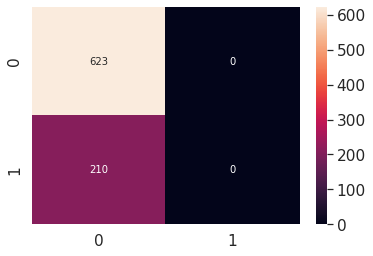

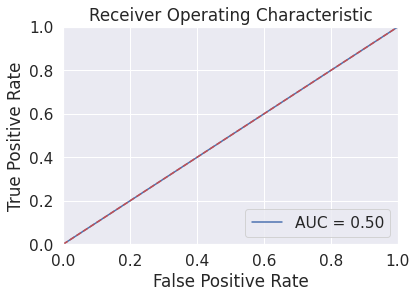

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,auc
import matplotlib.pyplot as plt
import seaborn as sn

# Predicting the Test set results
y_pred =svm_classifier.predict(x_test)

print(metrics.classification_report(y_test, y_pred,  digits=5))
confusion_matrix(y_test, y_pred,)
print(confusion_matrix)
plot_confussion_matrix(y_test, y_pred)
plot_roc_curve(y_test, y_pred)

In [ ]:

# make predictions on test set
preds_test = svm_classifier.predict(elmo_test_new)

In [ ]:
# prepare submission dataframe
sub = pd.DataFrame({'id':y_test1, 'label':preds_test})

# write predictions to a CSV file
sub.to_csv("/content/drive/My Drive/nlp/elmo_results.csv", index=False)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0    0.75360   1.00000   0.85949       523
           1    0.00000   0.00000   0.00000       171

    accuracy                        0.75360       694
   macro avg    0.37680   0.50000   0.42975       694
weighted avg    0.56792   0.75360   0.64771       694

<function confusion_matrix at 0x7fbd38712680>


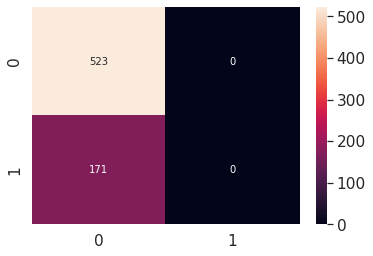

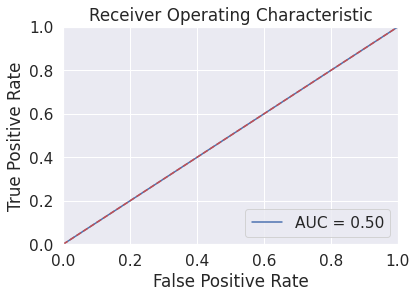

In [ ]:
print(metrics.classification_report(y_test1, preds_test,  digits=5))
confusion_matrix(y_test1, preds_test,)
print(confusion_matrix)
plot_confussion_matrix(y_test1, preds_test)
plot_roc_curve(y_test1, preds_test)